# Домашнее задание №2:
### В рамках домашнего задания необходимо провести кластеризацию текста, выполнив всю необходимую предобработку, а также поэксперементировать с кодличеством кластеров

# Данные
Данные доступны по ссылке:

```
https://github.com/knapweedss/TextMining_HSE/raw/main/dataHW2/asos.csv
```
Датасет состоит из отзывов на asos

## Обязательно к выполнению (оценка 8)

1. предобработка данных
2. векторизация (tf-idf)
3. кластеризация (k-means) - необходимо пояснить выбранное количество кластеров
4. визуализация полученных кластеров

## Дополнительно (оценка 10)
6. На выбор: проанализировать кластеры с разным количеством и применить понижение размерности (TSNE или PCA) / посмотреть и попробовать другой алгоритм кластеризации (библиотека sklearn)


# Требования к отправке:
* Название: TextMining2024_группа_ФамилияИмя_HW_2 Например: TextMining2024_4321_ПанькинНикита_HW_2.ipynb
* После решения задания необходимо скачать файл (Файл -> Скачать -> IPYNB)
* Затем отправить этот файл на почту cornflowersarecute@gmail.com, тема письма должна быть аналогична названию файла (без .ipynb)
* Или же выложить на гитхаб и в письме отправить ссылку на гитхаб

# Дедлайн - 12.07.2024 12:00, далее работы не принимаются.
* Ответы на вопросы по ДЗ прекращаются 10.05.2024 в 23:59

Перед отправкой лишний раз проверьте, что тетрадка выполняется с нуля (Среда выполнения -> Выполнить все);

Но делайте это заранее - кластеризация может быть не прям быстрой, если времени не хватает, то не нужно (лучше следить изначально за чистотой кода)

# Кластеризация (на 8)

In [ ]:
# скачиваем данные через wget и считываем в датафрейм | 0.5 баллов

In [ ]:
#устанавливаем все необходимые библиотеки для анализа данных (из семинара 8)
! pip install wget
%pip install pandas pymystem3 pyldavis wordcloud nltk sentence_transformers

In [ ]:
#с помощью вигет скачиваем файл
! wget https://github.com/knapweedss/TextMining_HSE/raw/main/dataHW2/asos.csv

--2024-06-25 20:26:39--  https://github.com/knapweedss/TextMining_HSE/raw/main/dataHW2/asos.csv
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/knapweedss/TextMining_HSE/main/dataHW2/asos.csv [following]
--2024-06-25 20:26:40--  https://raw.githubusercontent.com/knapweedss/TextMining_HSE/main/dataHW2/asos.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 366992 (358K) [text/plain]
Saving to: ‘asos.csv.3’

asos.csv.3          100%[===================>] 358.39K  2.29MB/s    in 0.2s    

2024-06-25 20:26:40 (2.29 MB/s) - ‘asos.csv.3’ saved [366992/366992]



In [ ]:
#считаем скачанный файл в датафрейм пандас
import pandas as pd

df = pd.read_csv("/content/asos.csv")

In [ ]:
df #проверим что всё сработало как надо

,Contents
0,I love ASOS and allCustomer service they are j...
1,My order was left outside and the school kids ...
2,Helpful and friendly staff.
3,Replied quickly and made sure their customers ...
4,Rebecca was patient and helpful with my querie...
...,...
1995,I used the live chat feature to try to cancel ...
1996,Helped me greatly!
1997,"Helpful, Fast and accurate"
1998,deanna is very friendly


In [ ]:
# предобработка | 1,5 балла

In [ ]:
#импортируем библиотеку nltk для обработки текстов, импортируем модули для работы со стоп-словами и пунктуацией
import nltk

nltk.download("stopwords")
nltk.download('punkt')
from nltk.corpus import stopwords
from pymystem3 import Mystem

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
m = Mystem()
stop_words = stopwords.words("english")

In [ ]:
import re

In [ ]:
#определим функции для обработки текстовых данных – взял с 8 семинара
url_pattern = re.compile(r'https?://\S+|www\.\S+')
def remove_urls(text):
    return url_pattern.sub(r' ', text)

date_pattern = re.compile(r"(\d{2}\.\d{2}\.?\d{0,4}?)\s")
def replace_dates(text):
    return date_pattern.sub(r'дата', text)

nonword_pattern = re.compile(r'[^а-яА-ЯёЁa-zA-Z\s]+')
def remove_nonwords(text):
    return nonword_pattern.sub(r' ', text)

money_pattern = re.compile(r"(\sр\s|руб)")
def replace_money_after_nonword(text):
    return money_pattern.sub(r'рублей', text)

def remove_extra_spaces(text):
    return re.sub(' +', ' ', text).strip()

def remove_unicode_chars(text):
    text = text.encode("utf8", "ignore").decode()
    return text

def remove_brackets(text):
    return text.replace("(", " ").replace(")", " ")

def remove_extra_spaces(text):
    return re.sub(' +', ' ', text).strip()

def tokenize(text):
    return nltk.word_tokenize(text)

def remove_stopwords(tokens):
    return list([t for t in tokens if t not in stop_words])

def lemmatize(tokens):
    lemmatized = []
    for t in tokens:
        lemma = m.lemmatize(t)[0]
        lemmatized.append(lemma)
    return lemmatized

In [ ]:
#объединим функции для удобства применения
def process_text(text, processors=[
        remove_urls,
        replace_dates,
        remove_nonwords,
        replace_money_after_nonword,
        remove_extra_spaces,
        remove_unicode_chars,
    ]):
    for f in processors:
        text = f(text)
    return text

In [ ]:
#применяем функцию к нашим текстовым данным
df['processed_text'] = df['Contents'].apply(process_text)

In [ ]:
def process_text_tfidf(text, processors=[
        tokenize,
        remove_stopwords,
        lemmatize,
    ]):
    for f in processors:
        text = f(text)
    return text

In [ ]:
df['processed_text_tfidf_tokens'] = df['processed_text'].apply(process_text_tfidf)
df['processed_text_tfidf'] = df['processed_text_tfidf_tokens'].apply(lambda v: ' '.join(v))

In [ ]:
df

,Contents,processed_text,processed_text_tfidf_tokens,processed_text_tfidf
0,I love ASOS and allCustomer service they are j...,I love ASOS and allCustomer service they are j...,"[I, love, ASOS, allCustomer, service, adorable]",I love ASOS allCustomer service adorable
1,My order was left outside and the school kids ...,My order was left outside and the school kids ...,"[My, order, left, outside, school, kids, ransa...",My order left outside school kids ransacked ho...
2,Helpful and friendly staff.,Helpful and friendly staff,"[Helpful, friendly, staff]",Helpful friendly staff
3,Replied quickly and made sure their customers ...,Replied quickly and made sure their customers ...,"[Replied, quickly, made, sure, customers, happy]",Replied quickly made sure customers happy
4,Rebecca was patient and helpful with my querie...,Rebecca was patient and helpful with my querie...,"[Rebecca, patient, helpful, queries, though, s...",Rebecca patient helpful queries though seems l...
...,...,...,...,...
1995,I used the live chat feature to try to cancel ...,I used the live chat feature to try to cancel ...,"[I, used, live, chat, feature, try, cancel, or...",I used live chat feature try cancel order I pu...
1996,Helped me greatly!,Helped me greatly,"[Helped, greatly]",Helped greatly
1997,"Helpful, Fast and accurate",Helpful Fast and accurate,"[Helpful, Fast, accurate]",Helpful Fast accurate
1998,deanna is very friendly,deanna is very friendly,"[deanna, friendly]",deanna friendly


In [ ]:
#выведем частотный словарь токенов, чтобы понять нужно ли добавить дополнительные стоп-слова
all_texts = ' '.join(df['processed_text_tfidf'])
all_tokens = nltk.word_tokenize(all_texts)

In [ ]:
from collections import Counter
word_freq = Counter(all_tokens)
most_common_words = word_freq.most_common(50)
for word, freq in most_common_words:
    print(f"{word}: {freq}")

I: 2162
service: 781
customer: 616
helpful: 593
order: 515
ASOS: 407
delivery: 394
chat: 329
issue: 269
help: 262
time: 259
get: 245
great: 224
The: 197
Asos: 183
quick: 178
items: 178
refund: 177
really: 173
would: 168
days: 162
Very: 161
day: 158
received: 157
problem: 151
item: 138
parcel: 134
back: 132
ordered: 129
good: 125
even: 125
Great: 124
got: 124
experience: 123
never: 122
Thank: 118
next: 115
sent: 115
one: 111
quickly: 109
It: 108
could: 107
told: 105
still: 103
company: 103
They: 103
delivered: 102
always: 100
email: 98
return: 98


In [ ]:
#расширим список стоп-слов незначимыми токенами
stop_words += ['I', 'get', 'The', 'even', 'It', 'could', 'They', 'My'] #My добавили во вторую итерацию сюда же, чтобы не добавлять много строк кода

In [ ]:
#занаво применим функцию с обновленным списком стоп-слов и посмотрим обновленный частотный словарь
df['processed_text_tfidf_tokens'] = df['processed_text'].apply(process_text_tfidf)
df['processed_text_tfidf'] = df['processed_text_tfidf_tokens'].apply(lambda v: ' '.join(v))

In [ ]:
all_texts = ' '.join(df['processed_text_tfidf'])
all_tokens = nltk.word_tokenize(all_texts)

In [ ]:
from collections import Counter
word_freq = Counter(all_tokens)
most_common_words = word_freq.most_common(50)
for word, freq in most_common_words:
    print(f"{word}: {freq}")

service: 781
customer: 616
helpful: 593
order: 515
ASOS: 407
delivery: 394
chat: 329
issue: 269
help: 262
time: 259
great: 224
Asos: 183
quick: 178
items: 178
refund: 177
really: 173
would: 168
days: 162
Very: 161
day: 158
received: 157
problem: 151
item: 138
parcel: 134
back: 132
ordered: 129
good: 125
Great: 124
got: 124
experience: 123
never: 122
Thank: 118
next: 115
sent: 115
one: 111
quickly: 109
told: 105
still: 103
company: 103
delivered: 102
always: 100
email: 98
return: 98
response: 97
resolved: 95
care: 93
helped: 92
live: 90
wait: 87
able: 83


In [ ]:
#теперь у нас датафрейм с токенезированными данными, очищенными от ненужных символов и стоп-слов

In [ ]:
# векторизация | 2 балл

In [ ]:
!pip install scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
#код для векторизации взял из 8 семинара
tfidf = TfidfVectorizer(
    ngram_range=(1,2),
    min_df=100, #10 75468
    max_df=1000,
    )
tfidf_matrix = tfidf.fit_transform(df['processed_text_tfidf'])
print(tfidf_matrix.shape, tfidf.get_feature_names_out())

(2000, 36) ['always' 'asos' 'back' 'chat' 'customer' 'customer service' 'day' 'days'
 'delivery' 'experience' 'fast' 'good' 'got' 'great' 'help' 'helpful'
 'issue' 'item' 'items' 'never' 'order' 'ordered' 'problem' 'quick'
 'quickly' 'really' 'received' 'refund' 'resolved' 'sent' 'service'
 'thank' 'thanks' 'time' 'very' 'would']


In [ ]:
import numpy as np

In [ ]:
def tfidf_top_features(tfidf, tfidf_matrix, head=10, tail=10):
  importance = np.argsort(np.asarray(tfidf_matrix.sum(axis=0)).ravel())[::-1]
  tfidf_feature_names = np.array(tfidf.get_feature_names_out())
  return tfidf_feature_names[importance[:head]], tfidf_feature_names[importance[-1*tail:]]
tfidf_top_features(tfidf, tfidf_matrix, 30, 30)

(array(['helpful', 'service', 'customer', 'asos', 'great',
        'customer service', 'quick', 'order', 'chat', 'delivery', 'help',
        'issue', 'very', 'thank', 'really', 'time', 'good', 'problem',
        'quickly', 'fast', 'thanks', 'refund', 'always', 'items', 'got',
        'resolved', 'received', 'item', 'would', 'days'], dtype=object),
 array(['quick', 'order', 'chat', 'delivery', 'help', 'issue', 'very',
        'thank', 'really', 'time', 'good', 'problem', 'quickly', 'fast',
        'thanks', 'refund', 'always', 'items', 'got', 'resolved',
        'received', 'item', 'would', 'days', 'experience', 'never', 'day',
        'ordered', 'back', 'sent'], dtype=object))

In [ ]:
# кластеризация | 2 балла

In [ ]:
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

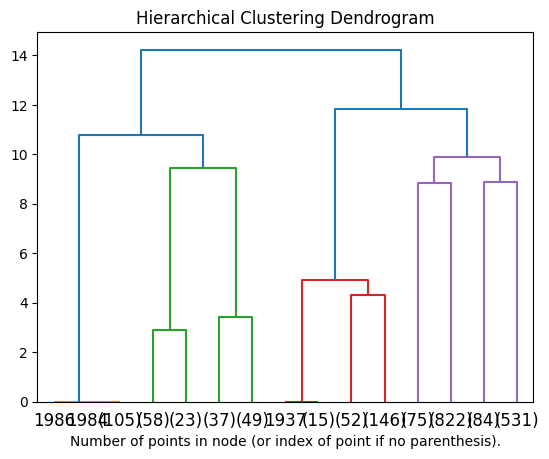

In [ ]:
#код из 8 семинара
def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)
    dendrogram(linkage_matrix, **kwargs)


X = tfidf_matrix.toarray()

# setting distance_threshold=0 ensures we compute the full tree.
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode="level", p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

In [ ]:
#по дендрограмме можем выделить 4 кластера, поэтому для дальнейшей кластеризации возьмем 4-кластерную модель

In [ ]:
model = AgglomerativeClustering(n_clusters=4) #здесь указываем количество кластеров, необходимое нам
clustering = model.fit(X)
df['agglomerative_clustering_labels'] = clustering.labels_
df['agglomerative_clustering_labels']

0       0
1       0
2       3
3       0
4       0
       ..
1995    0
1996    0
1997    0
1998    0
1999    0
Name: agglomerative_clustering_labels, Length: 2000, dtype: int64

In [ ]:
import functools
from wordcloud import WordCloud

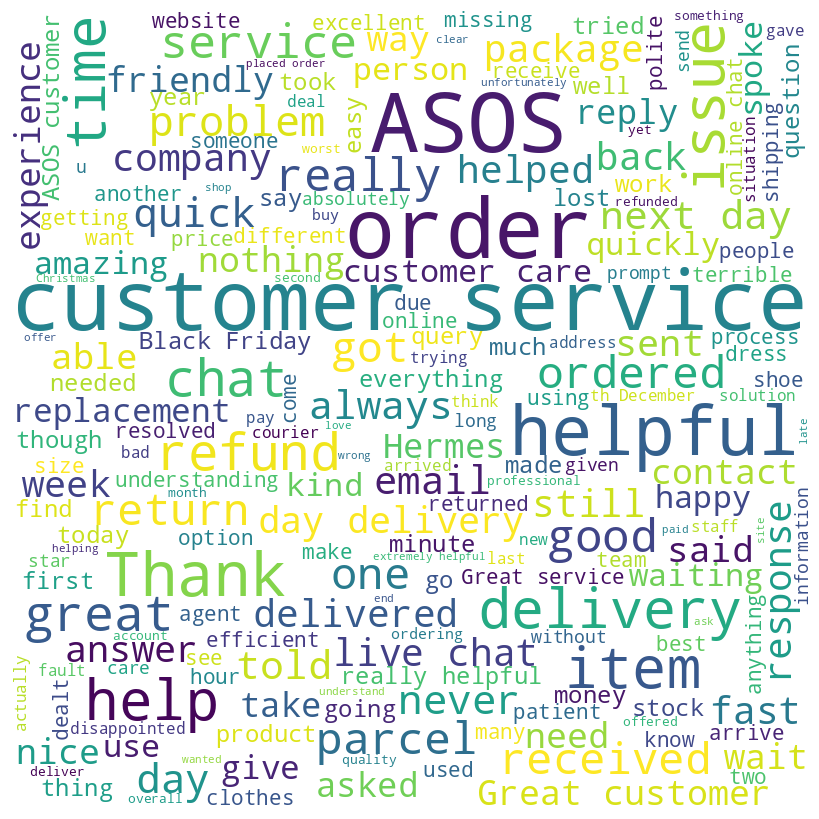

In [ ]:
#выведем облако слов для всего массива данных
def generate_wordcloud(series, stopwords = None):
    words = functools.reduce(
        lambda text, subtext : f'{text} {subtext} ',
        series,
        '',
    )
    return WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(words)

def show_wordclouds(*wordclouds):
    for wordcloud in wordclouds:
        plt.figure(figsize = (8, 8), facecolor = None)
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.tight_layout(pad = 0)
        plt.show()

show_wordclouds(generate_wordcloud(df["processed_text_tfidf"]))

Облако слов для #1 кластера


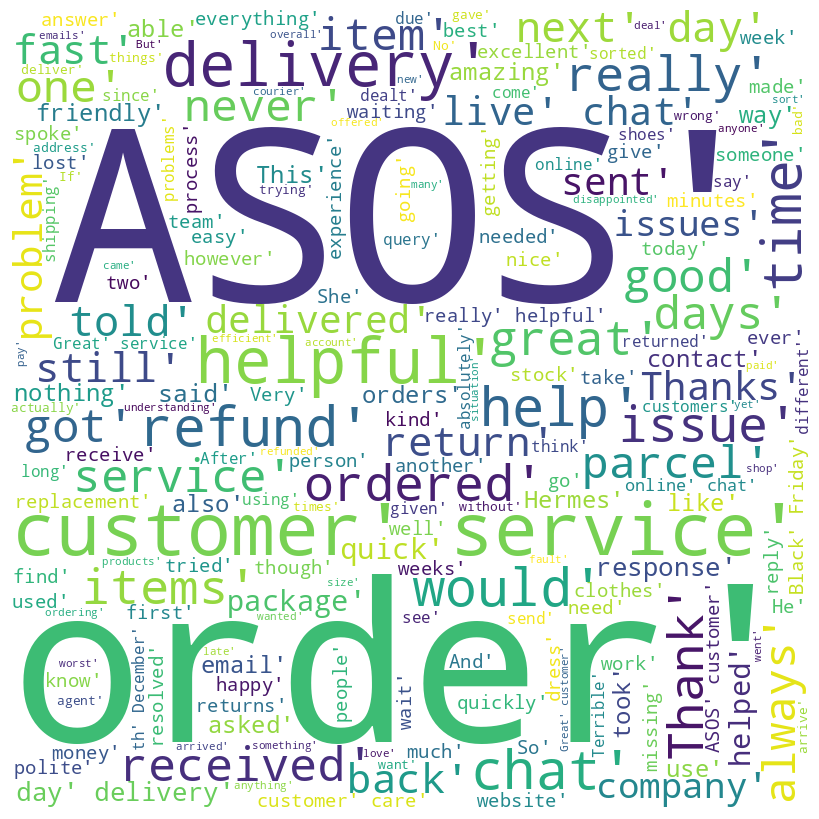

Облако слов для #2 кластера


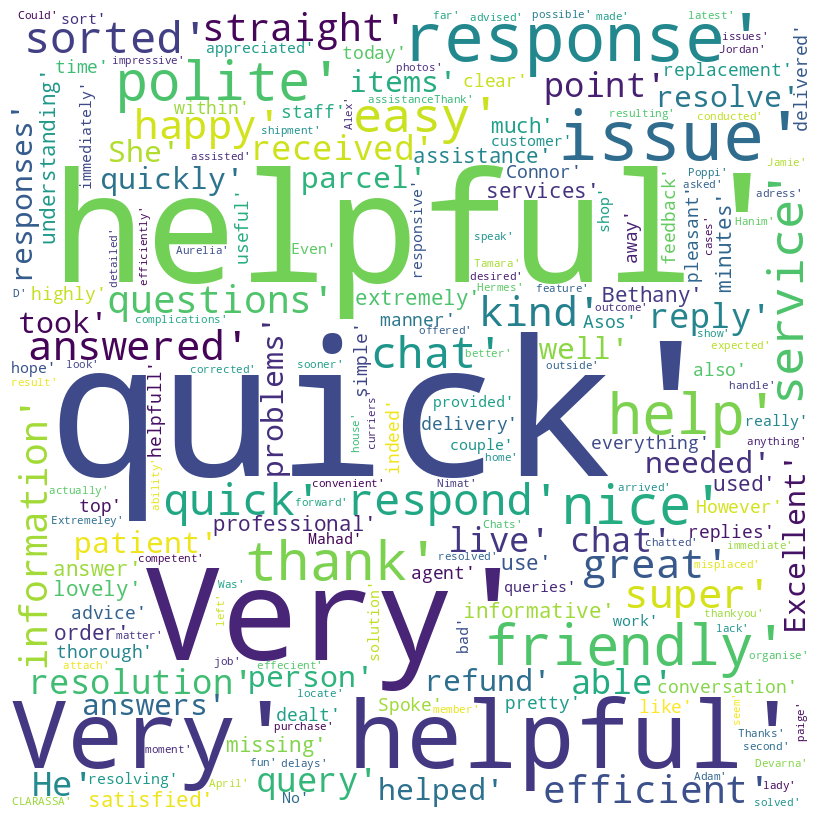

Облако слов для #3 кластера


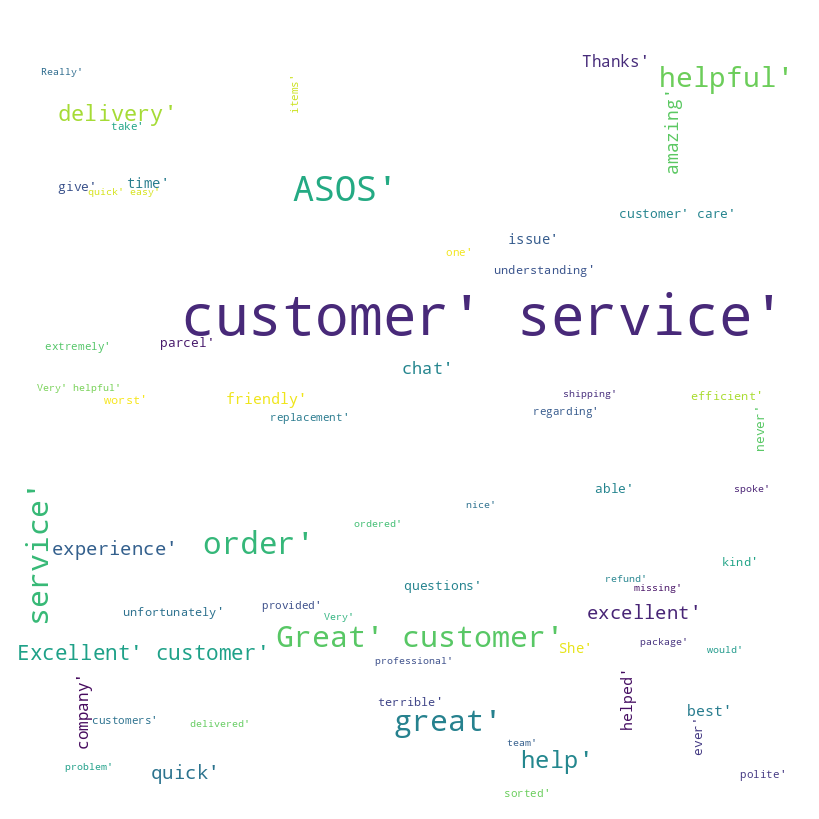

Облако слов для #4 кластера


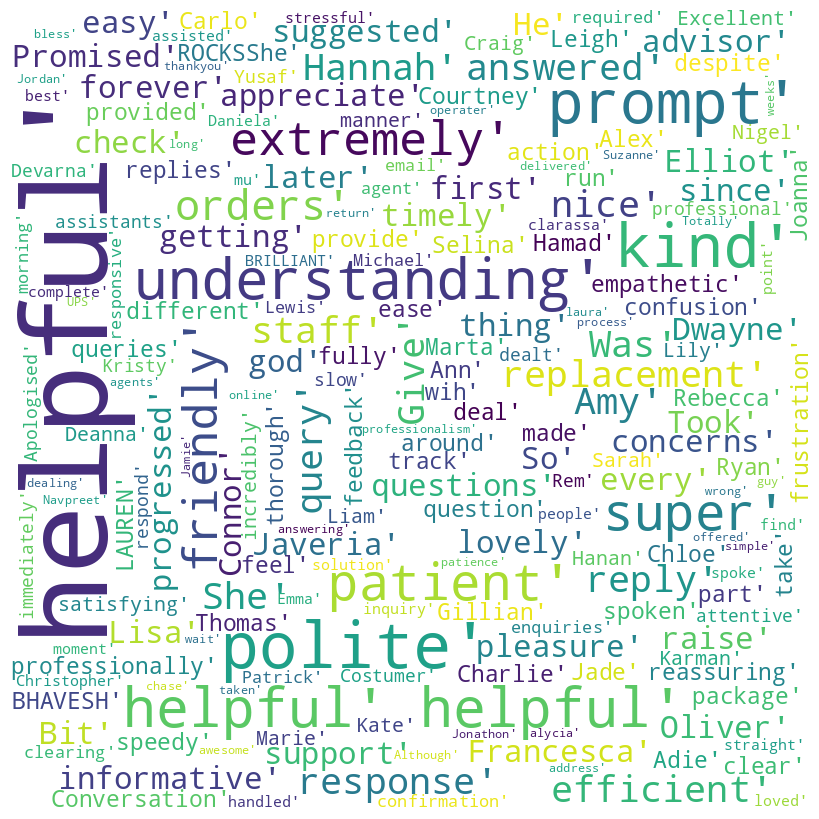

In [ ]:
#выведем облака слов для каждого из 4 кластеров
for i in range(4):
    print(f"Облако слов для #{i+1} кластера")
    cluster = df[df['agglomerative_clustering_labels'] == i]
    show_wordclouds(generate_wordcloud(cluster["processed_text_tfidf"].str.split(' ')))

In [ ]:
# визуализация кластеров | 2 балла

In [ ]:
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

In [ ]:
tsne = TSNE(n_components=2, random_state=42, perplexity=50, n_iter=300)
tsne_results = tsne.fit_transform(tfidf_matrix.toarray())

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


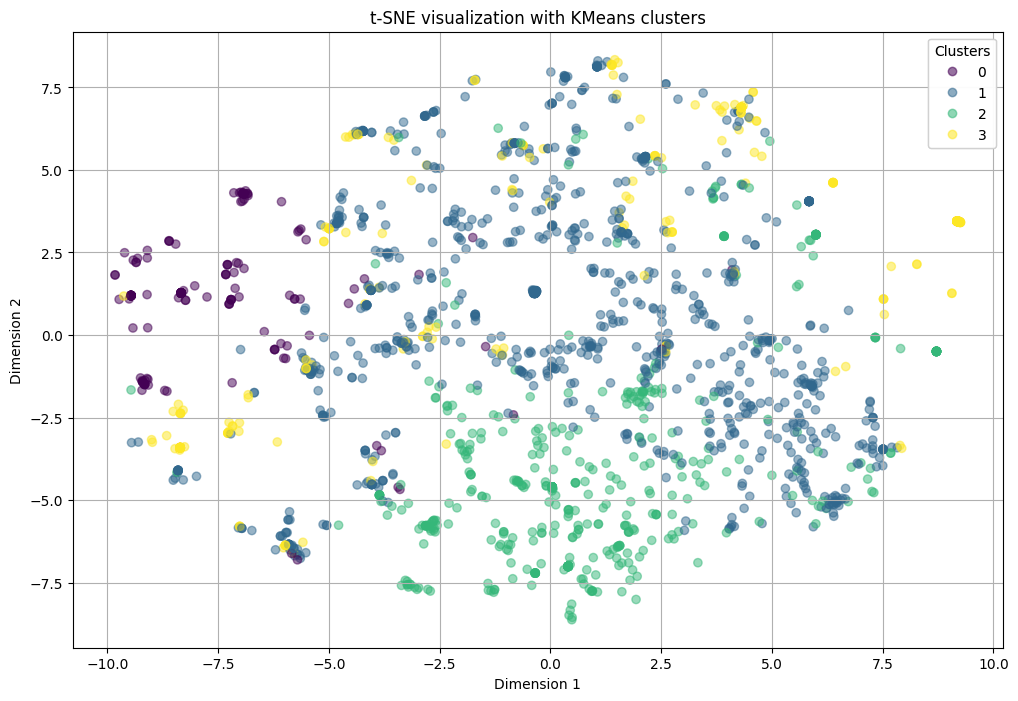

In [ ]:
num_clusters = 4 #выведем нашу 4-кластерную модель
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(tfidf_matrix)
clusters = kmeans.predict(tfidf_matrix)

df_tsne = pd.DataFrame(tsne_results, columns=['Dimension 1', 'Dimension 2'])
df_tsne['Cluster'] = clusters

plt.figure(figsize=(12, 8))
scatter = plt.scatter(df_tsne['Dimension 1'], df_tsne['Dimension 2'], c=df_tsne['Cluster'], cmap='viridis', alpha=0.5)

legend1 = plt.legend(*scatter.legend_elements(), title="Clusters")
plt.gca().add_artist(legend1)

plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('t-SNE visualization with KMeans clusters')
plt.grid(True)
plt.show()

# Дополнительно (на 10)

In [ ]:
# На выбор:
# проанализировать кластеры с разным количеством и применить понижение размерности (TSNE или PCA)
# посмотреть и попробовать другой алгоритм кластеризации (библиотека sklearn)

In [ ]:
#зададимм функцию которая позволит запускать любой из методов понижения размерности TSNE или PCA, в зависимости от передаваемого параметра
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

def cluster_and_reduce_dimensions(data, n_clusters_list, reduction_method='TSNE'):
    results = {}
    for n_clusters in n_clusters_list:
        print(f"Clustering with {n_clusters} clusters")

        model = AgglomerativeClustering(n_clusters=n_clusters)
        labels = model.fit_predict(data)

        if reduction_method == 'TSNE':
            reducer = TSNE(n_components=2, random_state=42)
        elif reduction_method == 'PCA':
            reducer = PCA(n_components=2)
        else:
            raise ValueError("Unknown reduction method. Use 'TSNE' or 'PCA'.")

        reduced_data = reducer.fit_transform(data)

        results[n_clusters] = (labels, reduced_data)

    return results

def plot_clusters(reduced_data, labels, title):
    plt.figure(figsize=(10, 8))
    unique_labels = np.unique(labels)

    for label in unique_labels:
        cluster_data = reduced_data[labels == label]
        plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {label}')

    plt.title(title)
    plt.legend()
    plt.show()

Clustering with 3 clusters
Clustering with 4 clusters
Clustering with 5 clusters
Clustering with 6 clusters


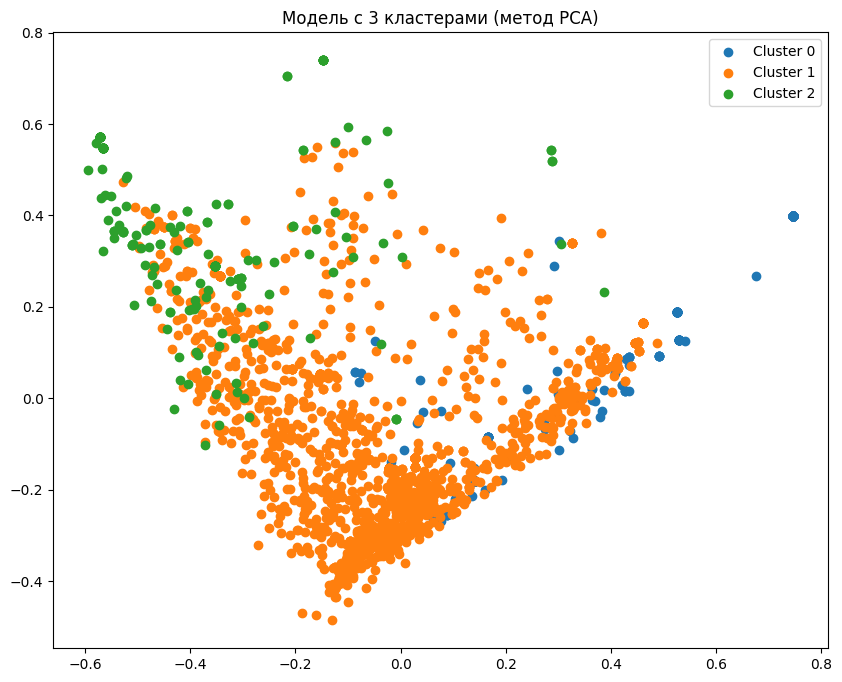

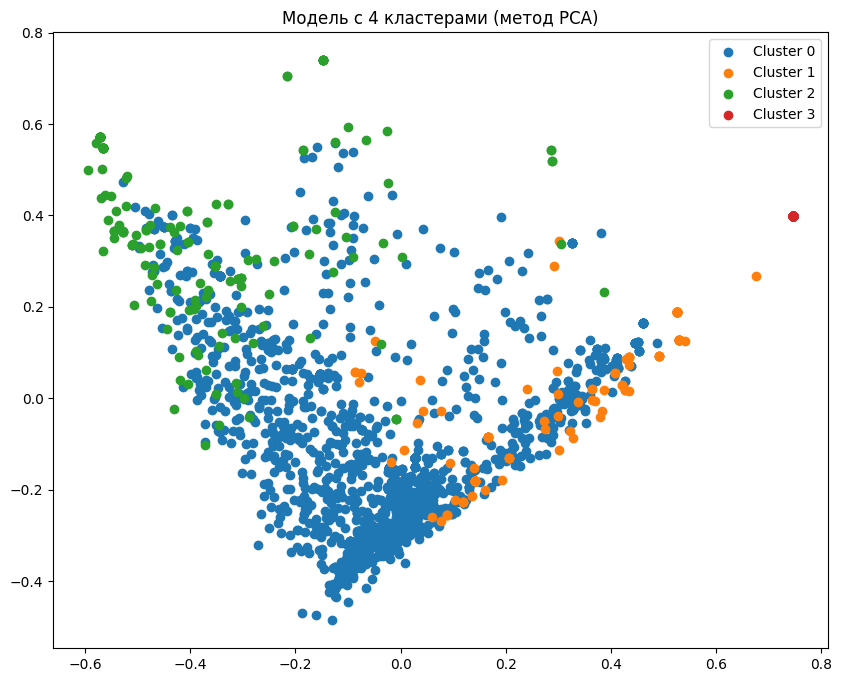

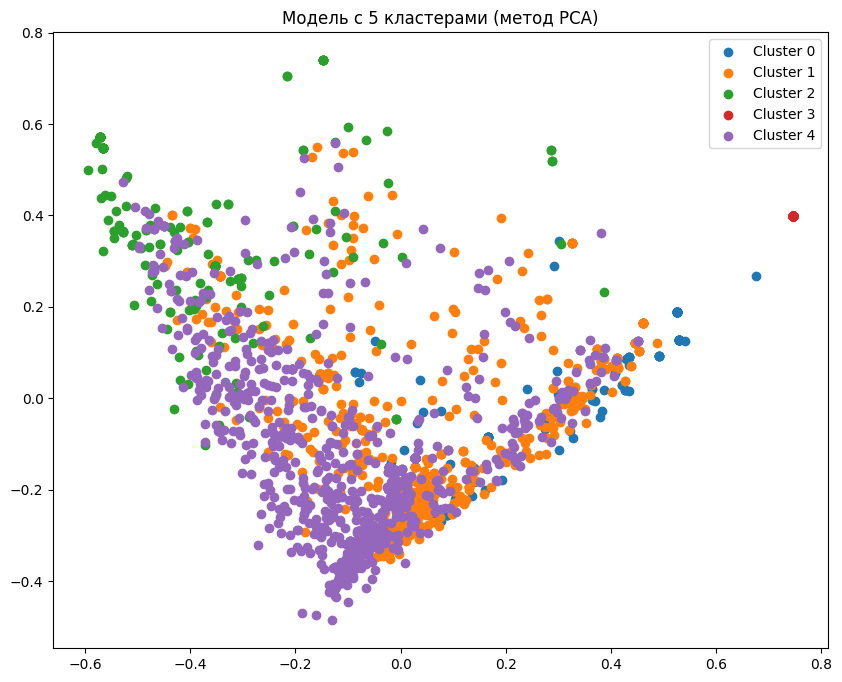

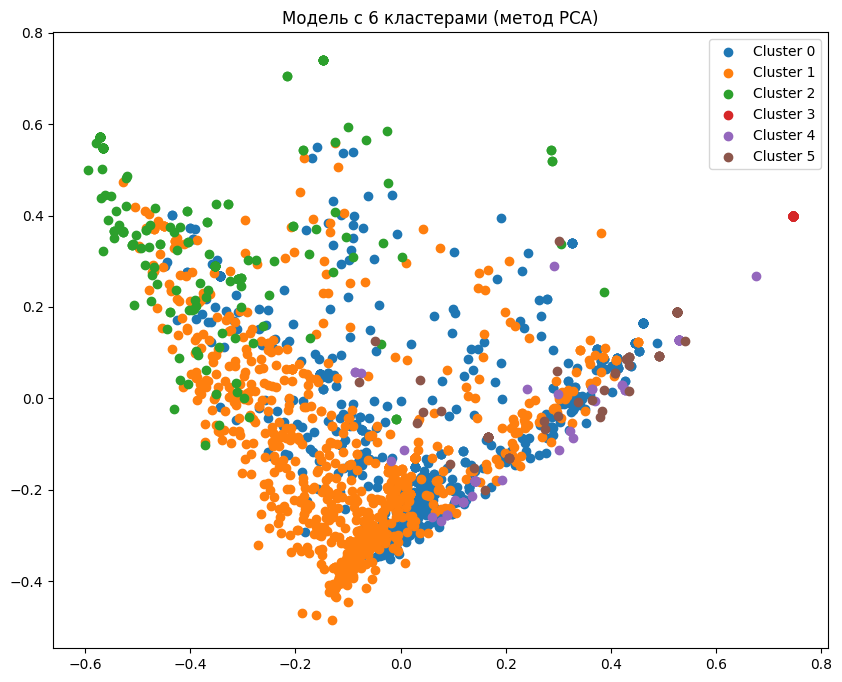

In [ ]:
#применим функцию к нашим данным и выведем несколько моделей с разным количеством кластеров. Воспользуемся методом PCA,  так как он быстрее работает
n_clusters_list = [3, 4, 5, 6]
reduction_method = 'PCA'

results = cluster_and_reduce_dimensions(tfidf_matrix.toarray(), n_clusters_list, reduction_method)

for n_clusters in n_clusters_list:
    labels, reduced_data = results[n_clusters]
    plot_clusters(reduced_data, labels, f'Модель с {n_clusters} кластерами (метод {reduction_method})')

Выводы: 3 и 4 диаграммы рассеивания иллюстрируют оптимальные для анализа кластерные модели (5ти и 6ти кластерные модели соответственно), так как на них можно проследить определенные группы данных одного цвета, наиболее приближенные друг к другу